In [1]:
import requests
from bs4 import BeautifulSoup as soup
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

In [2]:
url ='https://understat.com/player/2097'

In [3]:
html = requests.get(url)

In [4]:
html.content

b'<!DOCTYPE html>\n<html>\n    <head>\n\t\t<base href="https://understat.com/">\n\t\t<title>Lionel Messi | Barcelona | xG | Shot Map | Goal stats | Understat.com</title>\n        <meta charset="UTF-8" />\n\t\t<meta name="description" content="Lionel Messi football stats. xG, shot map, match history. Minutes, goals and assits by club, position, situation.">\n\t\t<meta name="Keywords" content="Lionel Messi, xG, expected goals, shot map, goals, assists, advanced statistics, match history, football stats"> \n\t\t\t<link rel="apple-touch-icon" sizes="180x180" href="apple-touch-icon.png">\n\t<link rel="icon" type="image/png" sizes="32x32" href="favicon-32x32.png">\n\t<link rel="icon" type="image/png" sizes="16x16" href="favicon-16x16.png">\n\t<link rel="manifest" href="manifest.json">\n\t<link rel="mask-icon" href="safari-pinned-tab.svg" color="#5bbad5">\n\t<meta name="apple-mobile-web-app-title" content="understat">\n\t<meta name="application-name" content="understat">\n\t<meta name="theme-

In [5]:
parse_soup = soup(html.content,'lxml')

In [6]:
scripts = parse_soup.find_all('script')
len(scripts)

25

In [7]:
scripts[3].string

"\n\tvar shotsData \t= JSON.parse('\\x5B\\x7B\\x22id\\x22\\x3A\\x2232522\\x22,\\x22minute\\x22\\x3A\\x2222\\x22,\\x22result\\x22\\x3A\\x22MissedShots\\x22,\\x22X\\x22\\x3A\\x220.7859999847412109\\x22,\\x22Y\\x22\\x3A\\x220.52\\x22,\\x22xG\\x22\\x3A\\x220.03867039829492569\\x22,\\x22player\\x22\\x3A\\x22Lionel\\x20Messi\\x22,\\x22h_a\\x22\\x3A\\x22h\\x22,\\x22player_id\\x22\\x3A\\x222097\\x22,\\x22situation\\x22\\x3A\\x22OpenPlay\\x22,\\x22season\\x22\\x3A\\x222014\\x22,\\x22shotType\\x22\\x3A\\x22LeftFoot\\x22,\\x22match_id\\x22\\x3A\\x225831\\x22,\\x22h_team\\x22\\x3A\\x22Barcelona\\x22,\\x22a_team\\x22\\x3A\\x22Elche\\x22,\\x22h_goals\\x22\\x3A\\x223\\x22,\\x22a_goals\\x22\\x3A\\x220\\x22,\\x22date\\x22\\x3A\\x222014\\x2D08\\x2D24\\x2020\\x3A00\\x3A00\\x22,\\x22player_assisted\\x22\\x3A\\x22Rafinha\\x22,\\x22lastAction\\x22\\x3A\\x22Pass\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x2232525\\x22,\\x22minute\\x22\\x3A\\x2241\\x22,\\x22result\\x22\\x3A\\x22Goal\\x22,\\x22X\\x22\\x3A\\x220.8619999

In [8]:
strings = scripts[3].string

In [10]:
ind_start = strings.index("('")+2
ind_end = strings.index("')")

json_data = strings[ind_start:ind_end]
json_data = json_data.encode('utf8').decode('unicode_escape')

json_data

'[{"id":"32522","minute":"22","result":"MissedShots","X":"0.7859999847412109","Y":"0.52","xG":"0.03867039829492569","player":"Lionel Messi","h_a":"h","player_id":"2097","situation":"OpenPlay","season":"2014","shotType":"LeftFoot","match_id":"5831","h_team":"Barcelona","a_team":"Elche","h_goals":"3","a_goals":"0","date":"2014-08-24 20:00:00","player_assisted":"Rafinha","lastAction":"Pass"},{"id":"32525","minute":"41","result":"Goal","X":"0.8619999694824219","Y":"0.615","xG":"0.06870150566101074","player":"Lionel Messi","h_a":"h","player_id":"2097","situation":"OpenPlay","season":"2014","shotType":"LeftFoot","match_id":"5831","h_team":"Barcelona","a_team":"Elche","h_goals":"3","a_goals":"0","date":"2014-08-24 20:00:00","player_assisted":"Sergio Busquets","lastAction":"BallRecovery"},{"id":"32529","minute":"62","result":"Goal","X":"0.86","Y":"0.435","xG":"0.15034306049346924","player":"Lionel Messi","h_a":"h","player_id":"2097","situation":"OpenPlay","season":"2014","shotType":"LeftFoot",

In [11]:
data = json.loads(json_data)

data

[{'id': '32522',
  'minute': '22',
  'result': 'MissedShots',
  'X': '0.7859999847412109',
  'Y': '0.52',
  'xG': '0.03867039829492569',
  'player': 'Lionel Messi',
  'h_a': 'h',
  'player_id': '2097',
  'situation': 'OpenPlay',
  'season': '2014',
  'shotType': 'LeftFoot',
  'match_id': '5831',
  'h_team': 'Barcelona',
  'a_team': 'Elche',
  'h_goals': '3',
  'a_goals': '0',
  'date': '2014-08-24 20:00:00',
  'player_assisted': 'Rafinha',
  'lastAction': 'Pass'},
 {'id': '32525',
  'minute': '41',
  'result': 'Goal',
  'X': '0.8619999694824219',
  'Y': '0.615',
  'xG': '0.06870150566101074',
  'player': 'Lionel Messi',
  'h_a': 'h',
  'player_id': '2097',
  'situation': 'OpenPlay',
  'season': '2014',
  'shotType': 'LeftFoot',
  'match_id': '5831',
  'h_team': 'Barcelona',
  'a_team': 'Elche',
  'h_goals': '3',
  'a_goals': '0',
  'date': '2014-08-24 20:00:00',
  'player_assisted': 'Sergio Busquets',
  'lastAction': 'BallRecovery'},
 {'id': '32529',
  'minute': '62',
  'result': 'Goal

In [12]:
x = []
y = []
xg = []
result = []
season = []

for i,_ in enumerate(data):
    for key in data[i]:
        if key=='X':
            x.append(data[i][key])
        if key=='Y':
            y.append(data[i][key])
        if key=='xG':
            xg.append(data[i][key])
        if key=='result':
            result.append(data[i][key])
        if key=='season':
            season.append(data[i][key])

In [13]:
columns = ['X','Y','xG','Result','Season']

df_understat = pd.DataFrame([x, y, xg, result, season], index=columns)

df_understat

0                    1                    2     \
X        0.7859999847412109   0.8619999694824219                 0.86   
Y                      0.52                0.615                0.435   
xG      0.03867039829492569  0.06870150566101074  0.15034306049346924   
Result          MissedShots                 Goal                 Goal   
Season                 2014                 2014                 2014   

                        3                    4                     5     \
X         0.8180000305175781   0.8690000152587891    0.7230000305175781   
Y                       0.38  0.19200000762939454   0.49400001525878906   
xG      0.045503295958042145  0.06531666964292526  0.054804932326078415   
Result             SavedShot            SavedShot             SavedShot   
Season                  2014                 2014                  2014   

                       6                    7                    8     \
X        0.9119999694824219                0.885    0.875999984741211   
Y       0.49900001525878906   0.6020000076293945  0.43900001525878907   
xG       0.0971858948469162  0.11467907577753067  0.10627452284097672   
Result          MissedShots          BlockedShot          BlockedShot   
Season                 2014                 2014                 2014   

                       9     ...                 1234                 1235  \
X        0.9540000152587891  ...   0.8009999847412109    0.884000015258789   
Y       0.33599998474121096  ...    0.500999984741211   0.7440000152587891   
xG       0.3100203275680542  ...  0.06263650208711624  0.04012298956513405   
Result            SavedShot  ...          BlockedShot          MissedShots   
Season                 2014  ...                 2020                 2020   

                       1236                 1237                 1238  \
X         0.875999984741211   0.8809999847412109   0.7430000305175781   
Y       0.47200000762939454   0.4520000076293945                0.475   
xG       0.1276213377714157  0.11639686673879623  0.02285781502723694   
Result          BlockedShot          BlockedShot          MissedShots   
Season                 2020                 2020                 2020   

                       1239                1240                  1241  \
X        0.9519999694824218               0.925    0.7659999847412109   
Y        0.6659999847412109  0.4370000076293945   0.42400001525878905   
xG      0.06496187299489975  0.3019910752773285  0.032836854457855225   
Result          MissedShots                Goal           BlockedShot   
Season                 2020                2020                  2020   

                       1242                 1243  
X        0.8269999694824218   0.8040000152587891  
Y        0.3970000076293945                0.535  
xG      0.05391271412372589  0.04337277263402939  
Result            SavedShot          MissedShots  
Season                 2020                 2020  

[5 rows x 1244 columns]

In [14]:
df_understat = df_understat.T

df_understat = df_understat.apply(pd.to_numeric,errors='ignore')

df_understat

X      Y        xG       Result  Season
0     0.786  0.520  0.038670  MissedShots    2014
1     0.862  0.615  0.068702         Goal    2014
2     0.860  0.435  0.150343         Goal    2014
3     0.818  0.380  0.045503    SavedShot    2014
4     0.869  0.192  0.065317    SavedShot    2014
...     ...    ...       ...          ...     ...
1239  0.952  0.666  0.064962  MissedShots    2020
1240  0.925  0.437  0.301991         Goal    2020
1241  0.766  0.424  0.032837  BlockedShot    2020
1242  0.827  0.397  0.053913    SavedShot    2020
1243  0.804  0.535  0.043373  MissedShots    2020

[1244 rows x 5 columns]

In [15]:
df_understat['X'] = df_understat['X'].apply(lambda x:x*100)
df_understat['Y'] = df_understat['Y'].apply(lambda x:x*100)

df_understat

X          Y        xG       Result  Season
0     78.599998  52.000000  0.038670  MissedShots    2014
1     86.199997  61.500000  0.068702         Goal    2014
2     86.000000  43.500000  0.150343         Goal    2014
3     81.800003  38.000000  0.045503    SavedShot    2014
4     86.900002  19.200001  0.065317    SavedShot    2014
...         ...        ...       ...          ...     ...
1239  95.199997  66.599998  0.064962  MissedShots    2020
1240  92.500000  43.700001  0.301991         Goal    2020
1241  76.599998  42.400002  0.032837  BlockedShot    2020
1242  82.699997  39.700001  0.053913    SavedShot    2020
1243  80.400002  53.500000  0.043373  MissedShots    2020

[1244 rows x 5 columns]

In [16]:
def readfromhtml(filepath):
    df = pd.read_html(filepath)[0]
    column_lst = list(df.columns)
    for index in range(len(column_lst)):
        column_lst[index] = column_lst[index][1]

    df.columns = column_lst
    df.drop(df[df['Player'] == 'Player'].index, inplace=True)
    df = df.fillna('0')
    df.set_index('Rk', drop=True, inplace=True)
    try:
        df['Comp'] = df['Comp'].apply(lambda x: ' '.join(x.split()[1:]))
        df['Nation'] = df['Nation'].astype(str)
        df['Nation'] = df['Nation'].apply(lambda x: x.split()[-1])
    except:
        print('Error in uploading file:' + filepath)
    finally:
        df = df.apply(pd.to_numeric, errors='ignore')
        return df

In [17]:
df_fbref = readfromhtml('https://fbref.com/en/comps/Big5/shooting/players/Big-5-European-Leagues-Stats')

In [18]:
df_fbref

Player Nation    Pos           Squad            Comp  Age  \
Rk                                                                             
1           Ismael Aaneba    FRA  FW,DF      Strasbourg         Ligue 1   21   
2     Patrick van Aanholt    NED     DF  Crystal Palace  Premier League   29   
3             Issah Abbas    GHA  DF,FW        Mainz 05      Bundesliga   21   
4        Yunis Abdelhamid    MAR     DF           Reims         Ligue 1   32   
5           Sabit Abdulai    GHA     MF          Getafe         La Liga   21   
...                   ...    ...    ...             ...             ...  ...   
2819         Steven Zuber    SUI  DF,MF  Eint Frankfurt      Bundesliga   28   
2820     Martín Zubimendi    ESP     MF   Real Sociedad         La Liga   21   
2821      Martin Ødegaard    NOR     MF         Arsenal  Premier League   21   
2822      Martin Ødegaard    NOR  MF,FW     Real Madrid         La Liga   21   
2823        Filip Đuričić    SRB  MF,FW        Sassuolo         Serie A   28   

      Born   90s  Gls  Sh  ...  Dist  FK  PK  PKatt   xG  npxG  npxG/Sh  G-xG  \
Rk                         ...                                                  
1     1999   0.1    0   0  ...   0.0   0   0      0  0.0   0.0     0.00   0.0   
2     1990  19.7    0  18  ...  20.3   3   0      0  1.2   1.2     0.07  -1.2   
3     1998   0.2    0   0  ...   0.0   0   0      0  0.0   0.0     0.00   0.0   
4     1987  32.1    3  15  ...  10.2   0   0      0  1.7   1.7     0.11   1.3   
5     1999   0.7    0   0  ...   0.0   0   0      0  0.0   0.0     0.00   0.0   
...    ...   ...  ...  ..  ...   ...  ..  ..    ...  ...   ...      ...   ...   
2819  1991   6.5    0  10  ...  18.2   0   0      0  0.8   0.8     0.08  -0.8   
2820  1999  20.9    0   7  ...  12.3   0   0      0  0.6   0.6     0.08  -0.6   
2821  1998   9.6    1  15  ...  20.5   1   0      0  1.1   1.1     0.07  -0.1   
2822  1998   2.6    0   3  ...  19.9   0   0      0  0.1   0.1     0.04  -0.1   
2823  1992  23.1    5  55  ...  17.0   0   1      1  5.7   5.0     0.09  -0.7   

      np:G-xG  Matches  
Rk                      
1         0.0  Matches  
2        -1.2  Matches  
3         0.0  Matches  
4         1.3  Matches  
5         0.0  Matches  
...       ...      ...  
2819     -0.8  Matches  
2820     -0.6  Matches  
2821     -0.1  Matches  
2822     -0.1  Matches  
2823     -1.0  Matches  

[2823 rows x 26 columns]

In [19]:
pip install mplsoccer

  Created wheel for mplsoccer: filename=mplsoccer-1.0.5-cp37-none-any.whl size=62952 sha256=8c5a9ed377fde639ba88f040460be61b2f156b63e2cb43b67cf8bc0a8ce3c7b0
  Stored in directory: C:\Users\rdmhz\AppData\Local\pip\Cache\wheels\1e\89\34\a6679a2c0b05f035f97ccc671f73139d2859b7612995416d2a
Successfully built mplsoccer
Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install highlight-text

Note: you may need to restart the kernel to use updated packages.


In [19]:
from highlight_text import ax_text,fig_text
import mplsoccer

In [20]:
background = '#0C3A63'
text_color = 'yellow'
mpl.rcParams['xtick.color']=text_color
mpl.rcParams['ytick.color']=text_color
mpl.rcParams['text.color']=text_color
mpl.rcParams['font.family']='Candara'
mpl.rcParams['legend.fontsize'] = 15

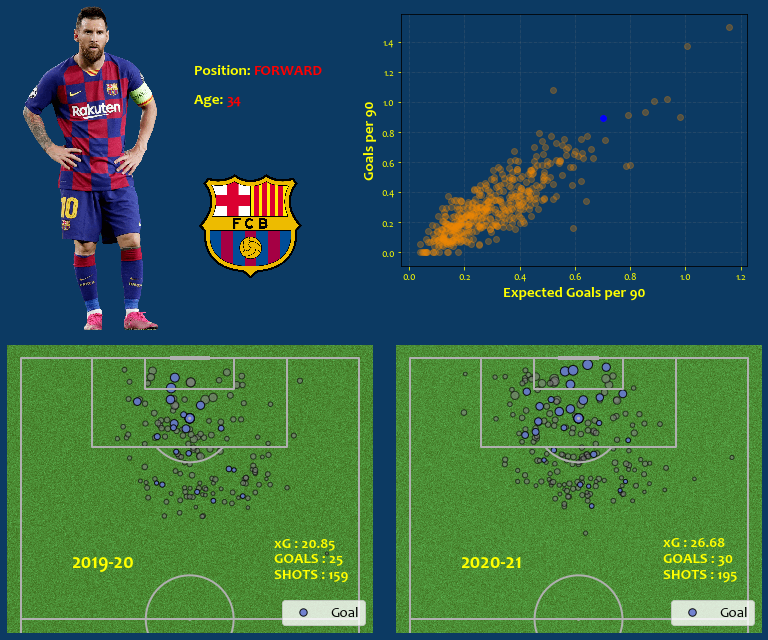

In [62]:
# SETTING UP THE AXES
fig, ax = plt.subplots(figsize=(12,10))
ax.axis('off')
fig.set_facecolor(background)

#SETTING UP THE MPL AXIS FOR THE FIRST SEASON
pitch = mplsoccer.VerticalPitch(half=True,pitch_type='opta',line_zorder=3,pitch_color='grass')
ax_opta1 = fig.add_axes((0.05, 0.06, 0.45, 0.4))
ax_opta1.patch.set_facecolor(background)
pitch.draw(ax=ax_opta1)

#PLOTTING OTHER SHOTS
df_fil = df_understat.loc[df_understat['Season']==2019]

pitch.scatter(df_fil[df_fil['Result']!='Goal']['X'],df_fil[df_fil['Result']!='Goal']['Y'], 
              s=np.sqrt(df_fil[df_fil['Result']!='Goal']['xG'])*100, marker='o', alpha=0.6,
              edgecolor='black', facecolor='grey', ax=ax_opta1)

#NOW PLOTTING THE GOALS IN THE 2019-20 SEASON
pitch.scatter(df_fil[df_fil['Result']=='Goal']['X'],df_fil[df_fil['Result']=='Goal']['Y'], 
              s=np.sqrt(df_fil[df_fil['Result']=='Goal']['xG'])*100, marker='o', alpha=0.9,
              edgecolor='black', facecolor='#6778d0', ax=ax_opta1, label='Goal')

# ADDING THE LEGEND
ax_opta1.legend(loc='lower right').get_texts()[0].set_color("black")

ax_opta1.text(25,61,'GOALS : '+str(len(df_fil[df_fil['Result']=='Goal'])), weight='bold', size=15)
ax_opta1.text(25,64,f"xG : {round(sum(df_fil['xG']),2)}", weight='bold', size=15)
ax_opta1.text(25,58,'SHOTS : '+str(len(df_fil)), weight='bold', size=15)
ax_opta1.text(85, 60, '2019-20', weight='bold', size=20)

# DOING THE SAME FOR THE 20-21 SEASON TOO
ax_opta2 = fig.add_axes((0.50, 0.06, 0.45, 0.4))
ax_opta2.patch.set_facecolor(background)
pitch.draw(ax=ax_opta2)

#PLOTTING OTHER SHOTS
df_fil = df_understat.loc[df_understat['Season']==2020]

pitch.scatter(df_fil[df_fil['Result']!='Goal']['X'],df_fil[df_fil['Result']!='Goal']['Y'], 
              s=np.sqrt(df_fil[df_fil['Result']!='Goal']['xG'])*100, marker='o', alpha=0.6,
              edgecolor='black', facecolor='grey', ax=ax_opta2)

#NOW PLOTTING THE GOALS IN THE 2019-20 SEASON
pitch.scatter(df_fil[df_fil['Result']=='Goal']['X'],df_fil[df_fil['Result']=='Goal']['Y'], 
              s=np.sqrt(df_fil[df_fil['Result']=='Goal']['xG'])*100, marker='o', alpha=0.9,
              edgecolor='black', facecolor='#6778d0', ax=ax_opta2, label='Goal')

# ADDING THE LEGEND
ax_opta2.legend(loc='lower right').get_texts()[0].set_color("black")

ax_opta2.text(25,61,'GOALS : '+str(len(df_fil[df_fil['Result']=='Goal'])), weight='bold', size=15)
ax_opta2.text(25,64,f"xG : {round(sum(df_fil['xG']),2)}", weight='bold', size=15)
ax_opta2.text(25,58,'SHOTS : '+str(len(df_fil)), weight='bold', size=15)
ax_opta2.text(85, 60, '2020-21', weight='bold', size=20)

# NOW PLOTTING THE SCATTERPLOT
ax_scatter = fig.add_axes([0.52,0.57,0.4,0.35])
ax_scatter.patch.set_facecolor(background)

# SETTING UP THE X AND Y OF THE SCATTERPLOT
no_90s = 10
df_fil = df_fbref[df_fbref['90s']>=no_90s]
df_fil = df_fil[df_fil['Pos'].apply(lambda x: x in ['FW','MF,FW','FW,MF'])]

x,y = (df_fil['xG']/df_fil['90s']).to_list(), (df_fil['Gls']/df_fil['90s']).to_list()

ax_scatter.scatter(x,y,alpha=0.3,c='#EF8804')

# NOW FILTERING LIONEL MESSI'S DATA
df_player = df_fil[df_fil['Player']=='Lionel Messi']
ax_scatter.scatter(df_player['xG']/df_player['90s'], df_player['Gls']/df_player['90s'], c='blue')

# ADDING FINISHING TOUCHES TO THE SCATTERPLOT
ax_scatter.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 0.5,
            alpha = 0.4)
ax_scatter.set_xlabel('Expected Goals per 90', fontdict = {'fontsize':15, 'weight' : 'bold', 'color':text_color})
ax_scatter.set_ylabel('Goals per 90', fontdict = dict(fontsize = 15, weight = 'bold',color=text_color))


#ADDING MESSI'S IMAGE
ax_player = fig.add_axes([0.035,0.48,0.25,0.45])
ax_player.axis('off')
im = plt.imread('Lionel_Messi.png')
ax_player.imshow(im)

# ADDING TITLES AND INFO
fig_text(0.2,0.97,"<LIONEL MESSI's> FINISHING",weight='heavy', size=20, highlight_textprops=[{'color':'red'}])
fig_text(0.28,0.85,'Position: <FORWARD>',weight='bold', size=15, highlight_textprops=[{'color':'red'}])
fig_text(0.28,0.81,'Age: <34>',weight='bold', size=15, highlight_textprops=[{'color':'red'}])

# ADDING CLUB LOGO
ax_team = fig.add_axes([0.27,0.55,0.15,0.15])
ax_team.axis('off')
im = plt.imread('barca.png')
ax_team.imshow(im)

# ADDING A FOOTER
fig_text(0.05,0.03,'Made by Ridam Hazra/@rhazra-003. Data from Fbref.com and Understat.com. Comparison with <forwards>'+
        ' with more than '+str(no_90s)+' 90s('+str(no_90s*90)+' minutes).',
        size=12, highlight_textprops=[{'color':'red'}], weight = 'bold')

plt.savefig('Messi_dashboard.png',dpi=300,facecolor=background)